# WeatherPy
----

### Analysis
* There is a negative correlation of -0.86 between maximum temperature and latitude in the northern hemisphere. The farther the place from the equator, the lower the temperature and hence this is an expected outcome. However, the correlation between temperature and latitude is positive in the southern hemisphere since the latitude increases as we approach the equator.
* The datasets for cloudiness and wind speed show some outliers. They do not have any but correlation to latitude or proximity to the equator.
* There is a strong correlation between humidity and latitude in the northern hemisphere. Humidity increases as we go closer to the latitude due to high temperatures.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Generate City List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create lists for the dataframe
cities_list = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temperature = []
wind_speed = []
countries = []

#Set initial count
counter = 0
set_count = 1

print("Beginning Data Retrieval")
print("--------------------------")

#if city is in the city list then get the data otherwise print the message of missing city.
for city in cities:
    print(f"Processing Record {counter} of Set {set_count} | {city}")

    # URL to request on
    final_url = query_url + city.replace(" ", "&")
    
    try:
        # Engage API, query, and cast to json      
        response = requests.get(final_url).json()

        # Populating lists with API data
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        # If record count below threshold, append, else
        if counter >= 50:
            counter = 1
            set_count +=1
            cities_list.append(city)
        else:
            counter += 1
            cities_list.append(city)
    except Exception:
        print("City not found. Skipping..")

        print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 0 of Set 1 | bama
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | amderma
City not found. Skipping..
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | tuban
Processing Record 4 of Set 1 | asau
Processing Record 5 of Set 1 | taldan
Processing Record 6 of Set 1 | mayo
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | gikongoro
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | stornoway
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 |

Processing Record 13 of Set 4 | namatanai
Processing Record 14 of Set 4 | aklavik
Processing Record 15 of Set 4 | kidal
Processing Record 16 of Set 4 | havre
Processing Record 17 of Set 4 | sao jose da coroa grande
Processing Record 18 of Set 4 | mana
Processing Record 19 of Set 4 | fredericton
Processing Record 20 of Set 4 | ketchikan
Processing Record 21 of Set 4 | faenza
Processing Record 22 of Set 4 | fort nelson
Processing Record 23 of Set 4 | guarapari
Processing Record 24 of Set 4 | ubon ratchathani
City not found. Skipping..
Processing Record 24 of Set 4 | khor
Processing Record 25 of Set 4 | camacha
Processing Record 26 of Set 4 | bantogon
Processing Record 27 of Set 4 | hofn
Processing Record 28 of Set 4 | pedernales
Processing Record 29 of Set 4 | calvia
Processing Record 30 of Set 4 | kruisfontein
Processing Record 31 of Set 4 | bethel
Processing Record 32 of Set 4 | mangrol
Processing Record 33 of Set 4 | harper
Processing Record 34 of Set 4 | nagorsk
Processing Record 35 

City not found. Skipping..
Processing Record 31 of Set 7 | muzhi
Processing Record 32 of Set 7 | parvatsar
Processing Record 33 of Set 7 | sunrise manor
Processing Record 34 of Set 7 | losheim
Processing Record 35 of Set 7 | pisco
Processing Record 36 of Set 7 | katsiveli
City not found. Skipping..
Processing Record 36 of Set 7 | olafsvik
Processing Record 37 of Set 7 | yar-sale
Processing Record 38 of Set 7 | morro bay
Processing Record 39 of Set 7 | rafai
Processing Record 40 of Set 7 | raudeberg
Processing Record 41 of Set 7 | murgab
Processing Record 42 of Set 7 | belaya gora
Processing Record 43 of Set 7 | saint-pierre
Processing Record 44 of Set 7 | chute-aux-outardes
Processing Record 45 of Set 7 | linjiang
Processing Record 46 of Set 7 | namibe
Processing Record 47 of Set 7 | chalons-en-champagne
Processing Record 48 of Set 7 | soyo
Processing Record 49 of Set 7 | marawi
Processing Record 50 of Set 7 | byron bay
Processing Record 1 of Set 8 | axim
Processing Record 2 of Set 8 |

Processing Record 47 of Set 10 | cumaribo
City not found. Skipping..
Processing Record 47 of Set 10 | mogadishu
Processing Record 48 of Set 10 | pavlodar
Processing Record 49 of Set 10 | dukat
Processing Record 50 of Set 10 | domanivka
Processing Record 1 of Set 11 | mujiayingzi
Processing Record 2 of Set 11 | riyadh
Processing Record 3 of Set 11 | san quintin
Processing Record 4 of Set 11 | sistranda
Processing Record 5 of Set 11 | phan thiet
Processing Record 6 of Set 11 | namtsy
Processing Record 7 of Set 11 | mishelevka
Processing Record 8 of Set 11 | pong
Processing Record 9 of Set 11 | gurupi
Processing Record 10 of Set 11 | sorkjosen
Processing Record 11 of Set 11 | henties bay
City not found. Skipping..
Processing Record 11 of Set 11 | inhambane
Processing Record 12 of Set 11 | klaksvik
Processing Record 13 of Set 11 | valdivia
Processing Record 14 of Set 11 | oregon city
Processing Record 15 of Set 11 | samarai
Processing Record 16 of Set 11 | valparaiso
Processing Record 17 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create the DataFrame
weather_df = pd.DataFrame({
    "City" : cities_list,
    "Cloudiness" : cloudiness,
    "Country" : countries,
    "Date" : dates,
    "Humidity" : humidity,
    "Latitude" : lats,
    "Longitude" : lngs,
    "Max Temperature" : max_temperature,
    "Wind Speed" : wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,bama,99,NG,1604712585,39,11.52,13.69,70.68,4.68
1,ancud,100,CL,1604712585,76,-41.87,-73.82,51.01,10.29
2,new norfolk,75,LR,1604712586,94,6.65,-10.59,78.80,1.52
3,tuban,24,ID,1604712586,69,-6.90,112.06,83.77,7.56
4,asau,12,RO,1604712325,92,46.43,26.40,45.00,3.65


In [6]:
weather_df.count()

City               546
Cloudiness         546
Country            546
Date               546
Humidity           546
Latitude           546
Longitude          546
Max Temperature    546
Wind Speed         546
dtype: int64

In [7]:
#Exporting dataframe into csv
weather_df.to_csv(output_data_file)

#### Latitude vs. Temperature Plot

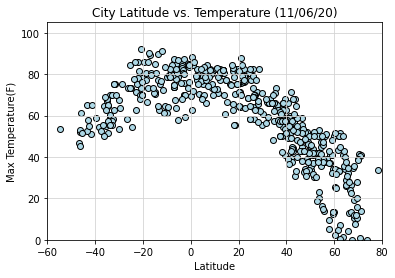

In [8]:
#Scatter plot for Latitude vs. Temperature using Matplotlib
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker= "o", edgecolor = "black", facecolor = "lightblue")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.xlim(-60, 80)
plt.ylim(0,105)
plt.grid(b=True, axis = "both", linestyle= "-", color="lightgrey")
plt.savefig("Figure1.png")
plt.show()

#### Latitude vs. Humidity Plot

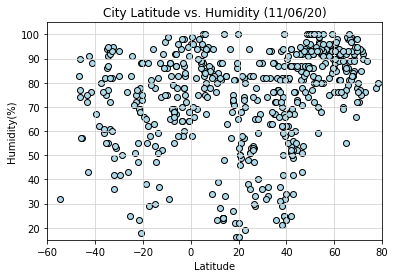

In [16]:
#Scatter plot for Latitude vs. Humidity using Matplotlib
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker= "o", edgecolor = "black", facecolor = "lightblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-60, 80)
plt.ylim(15,105)
plt.grid(b=True, axis = "both", linestyle= "-", color="lightgrey")
plt.savefig("Figure2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

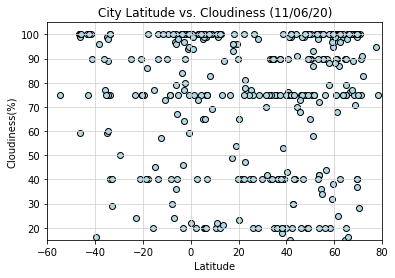

In [17]:
#Scatter plot for Latitude vs. Cloudiness using Matplotlib
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker= "o", edgecolor = "black", facecolor = "lightblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-60, 80)
plt.ylim(15,105)
plt.grid(b=True, axis = "both", linestyle= "-", color="lightgrey")
plt.savefig("Figure3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

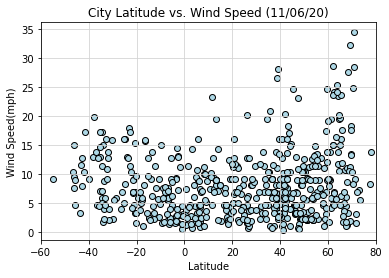

In [18]:
#Scatter plot for Latitude vs. Wind Speed using Matplotlib
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker= "o", edgecolor = "black", facecolor = "lightblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.xlim(-60, 80)
#plt.ylim(0,35)
plt.grid(b=True, axis = "both", linestyle= "-", color="lightgrey")
plt.savefig("Figure4.png")
plt.show()

In [12]:
#Northern and Southern Hemispehere
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

The correlation between both factors is -0.8607


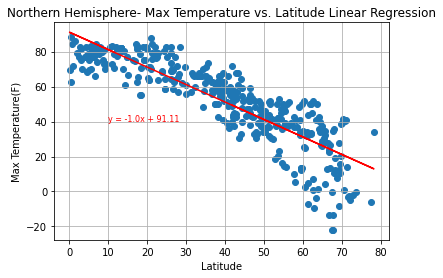

In [13]:
#Linear Regression for Max Temperature and Latitude in the Northern Hemisphere
correlation = sts.pearsonr(northern_hemisphere["Latitude"], northern_hemisphere["Max Temperature"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temperature"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (10,40), fontsize= 8, color="red")
plt.title("Northern Hemisphere- Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("Linear Regression- Latitude vs. Max Temperature.png")
plt.grid(True)
plt.show()

The correlation between both factors is 0.6577


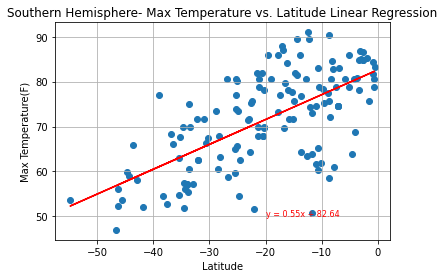

In [12]:
#Linear Regression for Max Temperature and Latitude in the Southern Hemisphere
correlation = sts.pearsonr(southern_hemisphere["Latitude"], southern_hemisphere["Max Temperature"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temperature"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (-20,50), fontsize= 8, color="red")
plt.title("Southern Hemisphere- Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("Linear Regression- Latitude vs. Max Temperature.png")
plt.grid(True)
plt.show()

The correlation between both factors is 0.2327


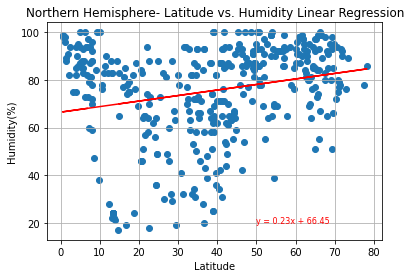

In [13]:
#Linear Regression for Humidity and Latitude in the Northern Hemisphere
correlation = sts.pearsonr(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (50,20), fontsize= 8, color="red")
plt.title("Northern Hemisphere- Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Linear Regression- Latitude vs. Humidity.png")
plt.grid(True)
plt.show()

The correlation between both factors is 0.1513


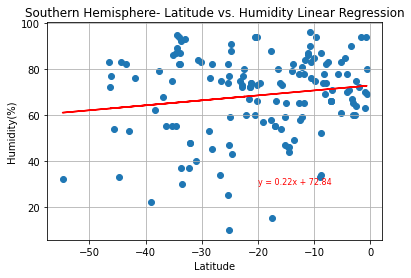

In [14]:
#Linear Regression for Humidity and Latitude in the Southern Hemisphere
correlation = sts.pearsonr(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (-20,30), fontsize= 8, color="red")
plt.title("Southern Hemisphere- Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Linear Regression- Latitude vs. Humidity.png")
plt.grid(True)
plt.show()

The correlation between both factors is 0.1834


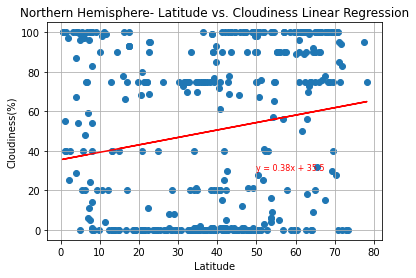

In [15]:
#Linear Regression for Cloudiness and Latitude in the Northern Hemisphere
correlation = sts.pearsonr(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (50,30), fontsize= 8, color="red")
plt.title("Northern Hemisphere- Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Linear Regression- Latitude vs. Cloudiness.png")
plt.grid(True)
plt.show()

The correlation between both factors is -0.0314


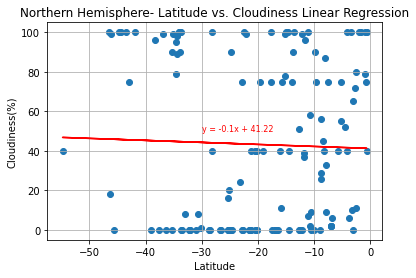

In [16]:
#Linear Regression for Cloudiness and Latitude in the Southern Hemisphere
correlation = sts.pearsonr(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (-30,50), fontsize= 8, color="red")
plt.title("Northern Hemisphere- Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Linear Regression- Latitude vs. Cloudiness.png")
plt.grid(True)
plt.show()

The correlation between both factors is 0.2556


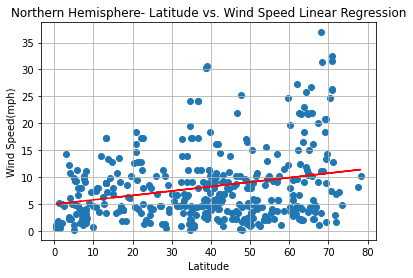

In [17]:
#Linear Regression for Wind Speed and Latitude in the Northern Hemisphere
correlation = sts.pearsonr(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (50,40), fontsize= 8, color="red")
plt.title("Northern Hemisphere- Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Linear Regression- Latitude vs. Wind Speed.png")
plt.grid(True)
plt.show()

The correlation between both factors is -0.2925


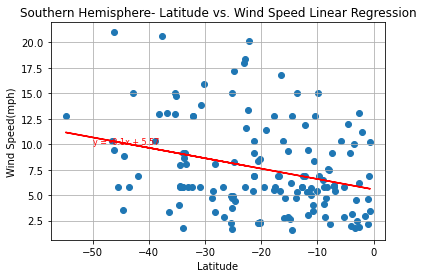

In [18]:
#Linear Regression for Wind Speed and Latitude in the Southern Hemisphere
correlation = sts.pearsonr(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],4)}")

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

slope, intercept, rvalue, pvalue, std = sts.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red")
plt.annotate(eq, (-50,10), fontsize= 8, color="red")
plt.title("Southern Hemisphere- Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Linear Regression- Latitude vs. Wind Speed.png")
plt.grid(True)
plt.show()